# WESAD dataset preprocessing and exploratory data analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_PATH = 'data/WESAD/'
DATA_PATH = 'data/WESAD/'
chest_columns=['sid', 'acc1', 'acc2', 'acc3', 'ecg', 'emg', 'eda', 'temp', 'resp', 'label']
all_columns =['sid', 'c_acc_x', 'c_acc_y', 'c_acc_z', 'ecg', 'emg', 'c_eda', 'c_temp', 'resp', 'w_acc_x' , 'w_acc_y', 'w_acc_z', 'bvp', 'w_eda', 'w_temp', 'label']
ids = [2,3,4,5,6,7,8,9,10,11,13,14,15,16,17]


sf_BVP = 64
sf_EDA = 4
sf_TEMP = 4
sf_ACC = 32
sf_chest = 700 


In [4]:
for i in ids:
    print(DATA_PATH + 'S' + str(i) + '/S' + str(i) + '.pkl')

data/WESAD/S2/S2.pkl
data/WESAD/S3/S3.pkl
data/WESAD/S4/S4.pkl
data/WESAD/S5/S5.pkl
data/WESAD/S6/S6.pkl
data/WESAD/S7/S7.pkl
data/WESAD/S8/S8.pkl
data/WESAD/S9/S9.pkl
data/WESAD/S10/S10.pkl
data/WESAD/S11/S11.pkl
data/WESAD/S13/S13.pkl
data/WESAD/S14/S14.pkl
data/WESAD/S15/S15.pkl
data/WESAD/S16/S16.pkl
data/WESAD/S17/S17.pkl


## Load data for all subjects

Once data was loaded it will also be stored in the dataframe format back to the file, so next time it can be read from the dataframe formated file instead of the pickle dictionary file.

In [7]:
df = pd.read_pickle(("merged_chest.pkl"))

In [8]:
df.head()

,sid,acc1,acc2,acc3,ecg,emg,eda,temp,resp,label
0,2.0,0.9554,-0.2220,-0.5580,0.021423,-0.004440,5.250549,30.120758,-1.148987,0.0
1,2.0,0.9258,-0.2216,-0.5538,0.020325,0.004349,5.267334,30.129517,-1.124573,0.0
2,2.0,0.9082,-0.2196,-0.5392,0.016525,0.005173,5.243301,30.138214,-1.152039,0.0
3,2.0,0.8974,-0.2102,-0.5122,0.016708,0.007187,5.249405,30.129517,-1.158142,0.0
4,2.0,0.8882,-0.2036,-0.4824,0.011673,-0.015152,5.286407,30.130951,-1.161194,0.0


In [9]:
df.label.value_counts()

0.0    27654897
1.0    12327702
4.0     8264199
2.0     6976201
3.0     3902501
7.0      576802
6.0      552998
5.0      552300
Name: label, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60807600 entries, 0 to 60807599
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   sid     float64
 1   acc1    float64
 2   acc2    float64
 3   acc3    float64
 4   ecg     float64
 5   emg     float64
 6   eda     float64
 7   temp    float64
 8   resp    float64
 9   label   float64
dtypes: float64(10)
memory usage: 4.5 GB


In [11]:
df.describe()

,sid,acc1,acc2,acc3,ecg,emg,eda,temp,resp,label
count,6.080760e+07,6.080760e+07,6.080760e+07,6.080760e+07,6.080760e+07,6.080760e+07,6.080760e+07,6.080760e+07,6.080760e+07,6.080760e+07
mean,9.095847e+00,8.116865e-01,-4.424838e-02,-2.590081e-01,1.064648e-03,-3.038247e-03,4.888237e+00,3.390494e+01,5.424958e-02,1.334726e+00
std,4.773224e+00,1.312529e-01,1.038886e-01,3.321664e-01,2.686881e-01,1.790485e-02,3.531247e+00,1.216936e+00,4.099116e+00,1.628349e+00
min,2.000000e+00,-6.600000e+00,-6.600000e+00,-6.600000e+00,-1.500000e+00,-1.500000e+00,0.000000e+00,-2.731500e+02,-5.000000e+01,0.000000e+00
25%,5.000000e+00,7.598000e-01,-7.980001e-02,-4.652000e-01,-9.169006e-02,-1.020813e-02,2.328873e+00,3.361404e+01,-2.064514e+00,0.000000e+00
50%,9.000000e+00,8.622000e-01,-3.100002e-02,-2.520000e-01,-2.595520e-02,-2.700806e-03,3.719330e+00,3.417029e+01,-1.983643e-01,1.000000e+00
75%,1.400000e+01,9.010000e-01,1.540005e-02,-6.760001e-02,3.300476e-02,4.257202e-03,7.057571e+00,3.461713e+01,2.171326e+00,2.000000e+00
max,1.700000e+01,2.981400e+00,1.609000e+00,4.508200e+00,1.499954e+00,1.464340e+00,2.241096e+01,3.577805e+01,3.880005e+01,7.000000e+00


In [12]:
df_fltr = df[df["label"].isin([1,2,3])]

In [13]:
df_fltr.groupby(['sid', 'label']).count()

acc1    acc2    acc3     ecg     emg     eda    temp    resp
sid  label                                                                
2.0  1.0    800800  800800  800800  800800  800800  800800  800800  800800
     2.0    430500  430500  430500  430500  430500  430500  430500  430500
     3.0    253400  253400  253400  253400  253400  253400  253400  253400
3.0  1.0    798000  798000  798000  798000  798000  798000  798000  798000
     2.0    448000  448000  448000  448000  448000  448000  448000  448000
     3.0    262500  262500  262500  262500  262500  262500  262500  262500
4.0  1.0    810601  810601  810601  810601  810601  810601  810601  810601
     2.0    444500  444500  444500  444500  444500  444500  444500  444500
     3.0    260400  260400  260400  260400  260400  260400  260400  260400
5.0  1.0    838600  838600  838600  838600  838600  838600  838600  838600
     2.0    451500  451500  451500  451500  451500  451500  451500  451500
     3.0    261800  261800  261800  261800  261800  261800  261800  261800
6.0  1.0    826000  826000  826000  826000  826000  826000  826000  826000
     2.0    455000  455000  455000  455000  455000  455000  455000  455000
     3.0    260400  260400  260400  260400  260400  260400  260400  260400
7.0  1.0    830200  830200  830200  830200  830200  830200  830200  830200
     2.0    448000  448000  448000  448000  448000  448000  448000  448000
     3.0    260401  260401  260401  260401  260401  260401  260401  260401
8.0  1.0    818300  818300  818300  818300  818300  818300  818300  818300
     2.0    469000  469000  469000  469000  469000  469000  469000  469000
     3.0    258999  258999  258999  258999  258999  258999  258999  258999
9.0  1.0    826000  826000  826000  826000  826000  826000  826000  826000
     2.0    451500  451500  451500  451500  451500  451500  451500  451500
     3.0    260400  260400  260400  260400  260400  260400  260400  260400
10.0 1.0    826000  826000  826000  826000  826000  826000  826000  826000
     2.0    507500  507500  507500  507500  507500  507500  507500  507500
     3.0    260400  260400  260400  260400  260400  260400  260400  260400
11.0 1.0    826000  826000  826000  826000  826000  826000  826000  826000
     2.0    476000  476000  476000  476000  476000  476000  476000  476000
     3.0    257600  257600  257600  257600  257600  257600  257600  257600
13.0 1.0    826001  826001  826001  826001  826001  826001  826001  826001
     2.0    464800  464800  464800  464800  464800  464800  464800  464800
     3.0    267400  267400  267400  267400  267400  267400  267400  267400
14.0 1.0    826000  826000  826000  826000  826000  826000  826000  826000
     2.0    472500  472500  472500  472500  472500  472500  472500  472500
     3.0    260401  260401  260401  260401  260401  260401  260401  260401
15.0 1.0    822500  822500  822500  822500  822500  822500  822500  822500
     2.0    480200  480200  480200  480200  480200  480200  480200  480200
     3.0    260400  260400  260400  260400  260400  260400  260400  260400
16.0 1.0    826000  826000  826000  826000  826000  826000  826000  826000
     2.0    471101  471101  471101  471101  471101  471101  471101  471101
     3.0    257600  257600  257600  257600  257600  257600  257600  257600
17.0 1.0    826700  826700  826700  826700  826700  826700  826700  826700
     2.0    506100  506100  506100  506100  506100  506100  506100  506100
     3.0    260400  260400  260400  260400  260400  260400  260400  260400

In [14]:
# 1 = baseline, 2 = stress, 3 = amusement
perc_data = df_fltr.label.value_counts()

In [15]:
perc_data

1.0    12327702
2.0     6976201
3.0     3902501
Name: label, dtype: int64

In [16]:
perc_data = pd.DataFrame (perc_data)

In [17]:
perc_data

,label
1.0,12327702
2.0,6976201
3.0,3902501


In [18]:
perc_data.index

Float64Index([1.0, 2.0, 3.0], dtype='float64')

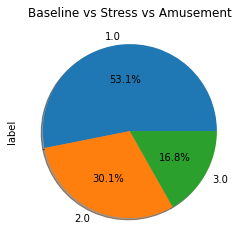

In [19]:
plot = perc_data.plot.pie(y="label", title="Baseline vs Stress vs Amusement", legend=False, \
                   autopct='%1.1f%%',  \
                   shadow=True, startangle=0)

In [20]:
df_fltr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23206404 entries, 214583 to 59628263
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   sid     float64
 1   acc1    float64
 2   acc2    float64
 3   acc3    float64
 4   ecg     float64
 5   emg     float64
 6   eda     float64
 7   temp    float64
 8   resp    float64
 9   label   float64
dtypes: float64(10)
memory usage: 1.9 GB


## Data Visualization

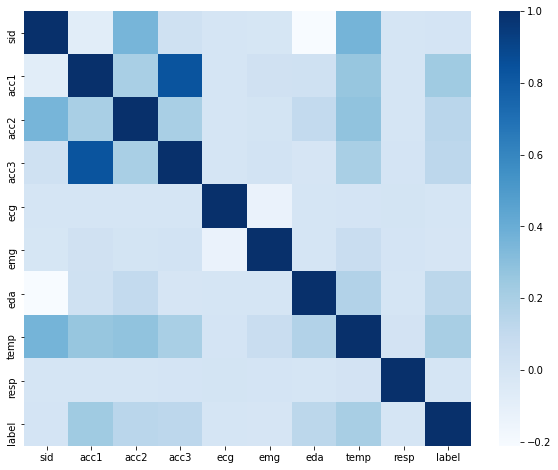

In [21]:
# check correlation
plt.figure(figsize=(10,8))
sns.heatmap(df_fltr.corr(),cmap='Blues',annot=False) 

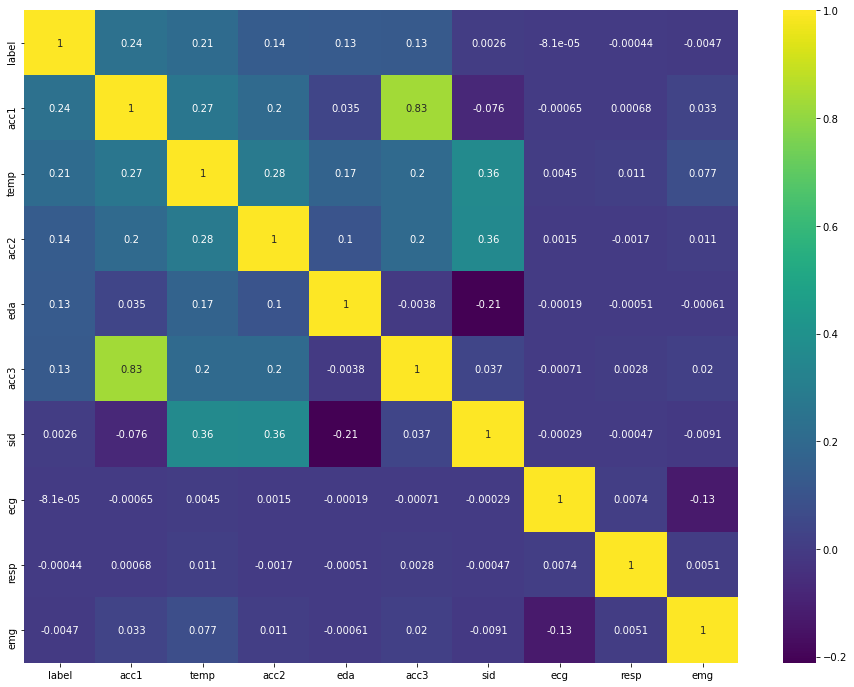

In [29]:
# Label correlation matrix
k = 15 #number of variables for heatmap
cols = df_fltr.corr().nlargest(k, 'label')['label'].index
cm = df_fltr[cols].corr()
plt.figure(figsize=(16,12))
sns.heatmap(cm, annot=True, cmap = 'viridis')

## TSNE analysis based on individual subject data

In [23]:
df2 = pd.read_pickle("S2.pkl")

In [24]:
df2.columns

Index(['sid', 'acc1', 'acc2', 'acc3', 'ecg', 'emg', 'eda', 'temp', 'resp',
       'label'],
      dtype='object')

In [25]:
N = 10000
feat_cols = ['acc1', 'acc2', 'acc3', 'ecg', 'emg', 'eda', 'temp', 'resp']
df_subset = df2.sample(n=N, random_state=42)
data_subset = df_subset[feat_cols].values

In [26]:
import time
from sklearn.manifold import TSNE

In [27]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.087s...
[t-SNE] Computed neighbors for 10000 samples in 1.206s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.153047
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.184853
[t-SNE] KL divergence after 5000 iterations: 0.651287
t-SNE done! Time elapsed

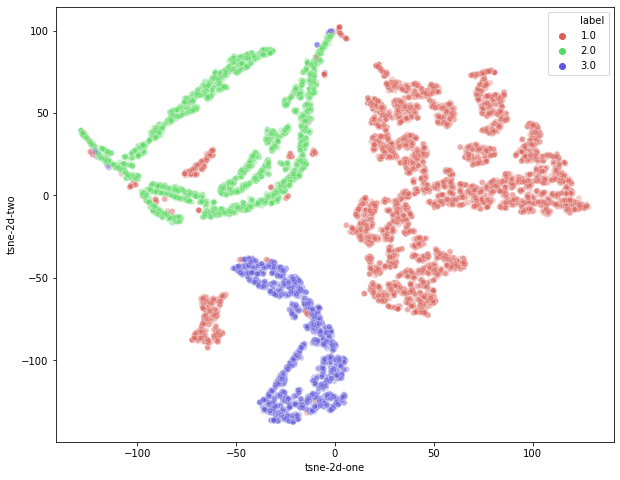

In [28]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 3),
    data=df_subset,
    legend="full",
    alpha=0.3
)

## TSNE analysis based on all subjects data

In [30]:
N = 10000
feat_cols = ['acc1', 'acc2', 'acc3', 'ecg', 'emg', 'eda', 'temp', 'resp']
df_subset = df_fltr.sample(n=N, random_state=42)
data_subset = df_subset[feat_cols].values

In [31]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.035s...
[t-SNE] Computed neighbors for 10000 samples in 0.419s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.351238
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.605347
[t-SNE] KL divergence after 5000 iterations: 0.687196
t-SNE done! Time elapsed

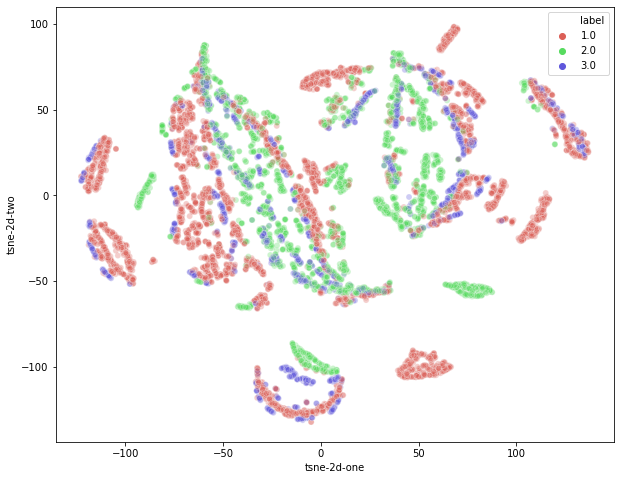

In [32]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(10,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 3),
    data=df_subset,
    legend="full",
    alpha=0.3
)

## Outliers

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.


In [38]:
df_fltr.columns.values

array(['sid', 'acc1', 'acc2', 'acc3', 'ecg', 'emg', 'eda', 'temp', 'resp',
       'label'], dtype=object)

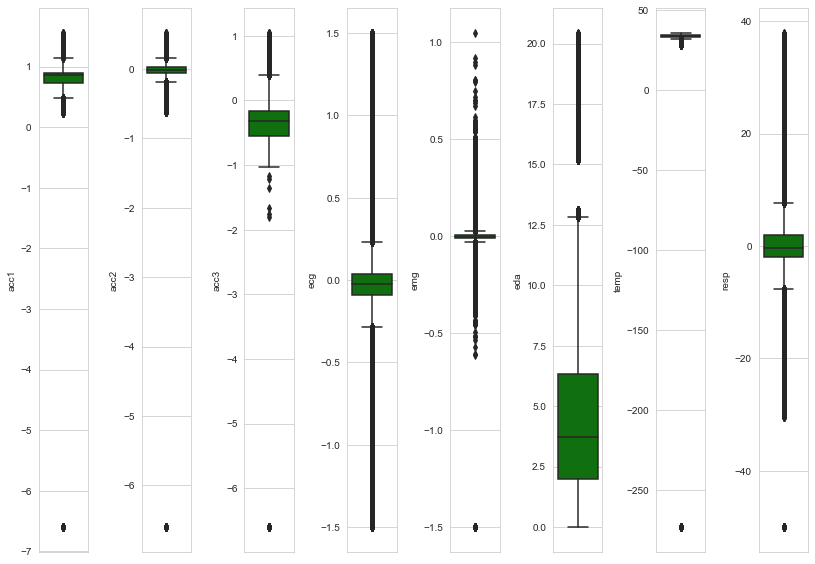

In [39]:
# to check outliers
l = df_fltr.columns.values[1:]
number_of_columns=14
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(20,70))
for i in range(0,len(l)-1):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df_fltr[l[i]],color='green',orient='v')
    plt.tight_layout()

## Check destribution of variables

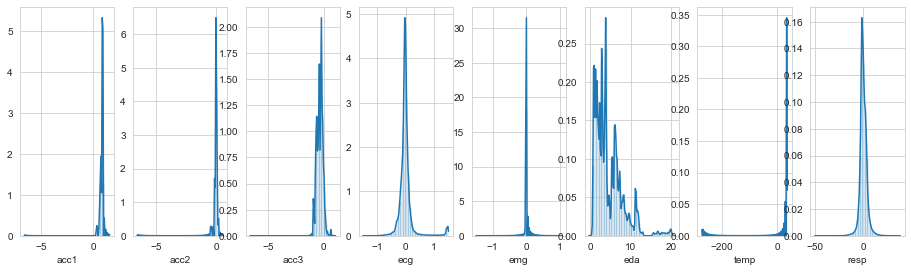

In [41]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)-1):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df_fltr[l[i]],kde=True) 

## Analysis on individual subjects


S2.pkl
df.label.value_counts: 
1.0    800800
2.0    430500
3.0    253400
Name: label, dtype: int64

S3.pkl
df.label.value_counts: 
1.0    798000
2.0    448000
3.0    262500
Name: label, dtype: int64

S4.pkl
df.label.value_counts: 
1.0    810601
2.0    444500
3.0    260400
Name: label, dtype: int64

S5.pkl
df.label.value_counts: 
1.0    838600
2.0    451500
3.0    261800
Name: label, dtype: int64

S6.pkl
df.label.value_counts: 
1.0    826000
2.0    455000
3.0    260400
Name: label, dtype: int64

S7.pkl
df.label.value_counts: 
1.0    830200
2.0    448000
3.0    260401
Name: label, dtype: int64

S8.pkl
df.label.value_counts: 
1.0    818300
2.0    469000
3.0    258999
Name: label, dtype: int64

S9.pkl
df.label.value_counts: 
1.0    826000
2.0    451500
3.0    260400
Name: label, dtype: int64

S10.pkl
df.label.value_counts: 
1.0    826000
2.0    507500
3.0    260400
Name: label, dtype: int64

S11.pkl
df.label.value_counts: 
1.0    826000
2.0    476000
3.0    257600
Name: label, dtype: int6

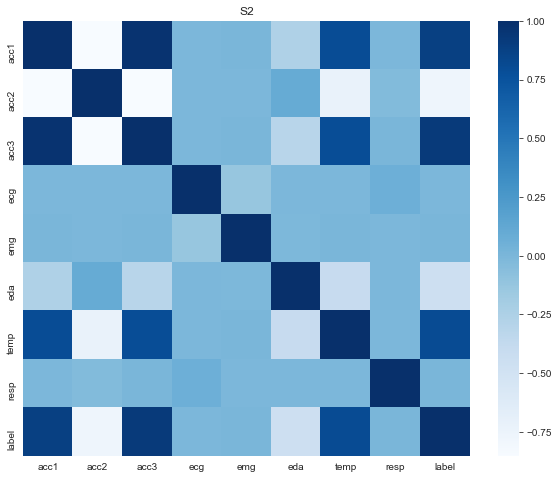

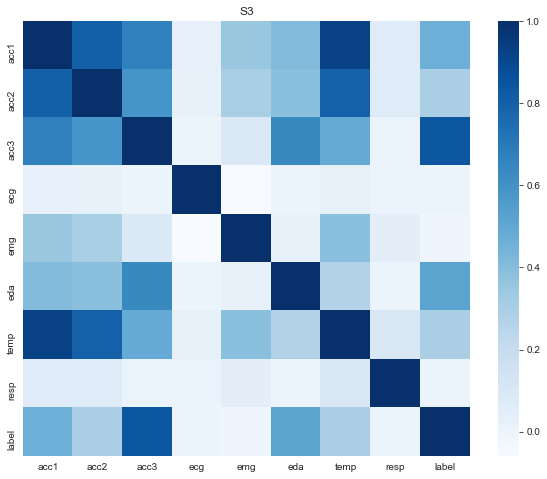

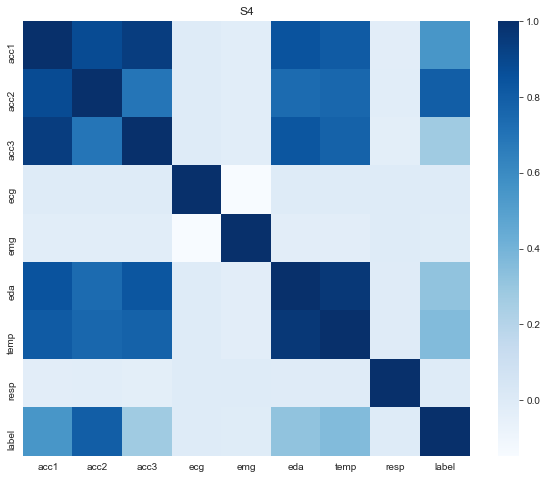

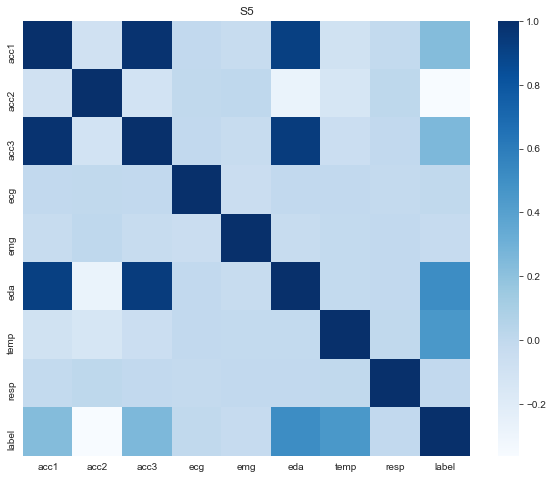

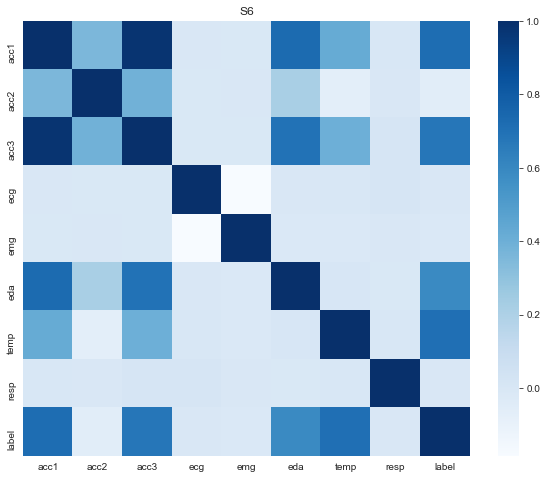

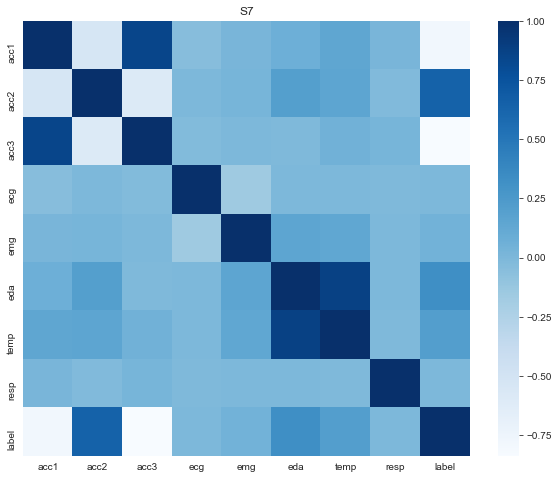

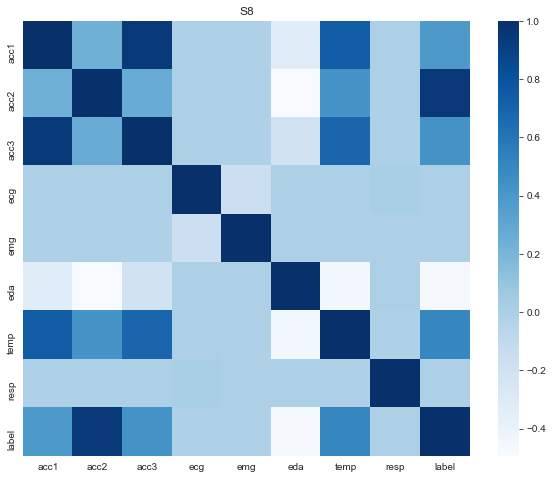

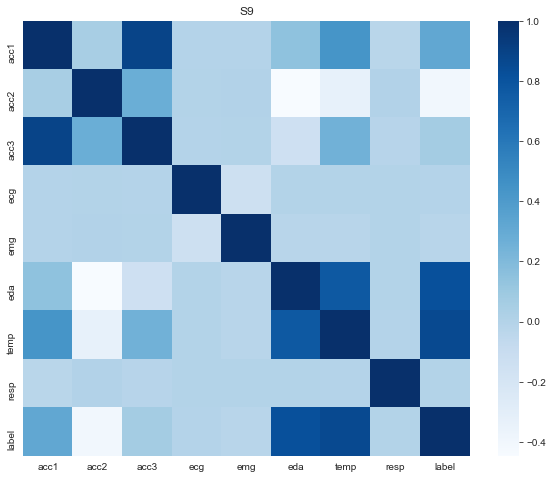

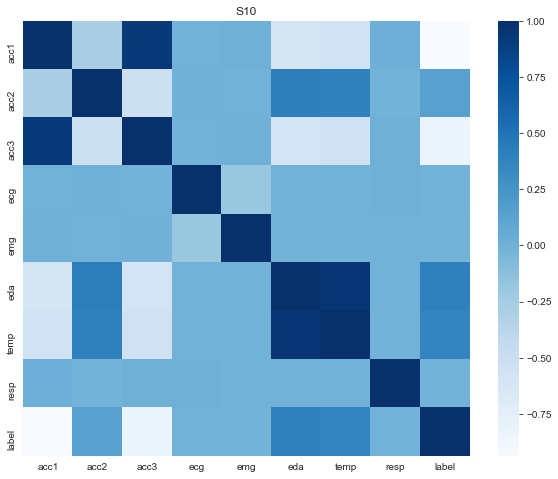

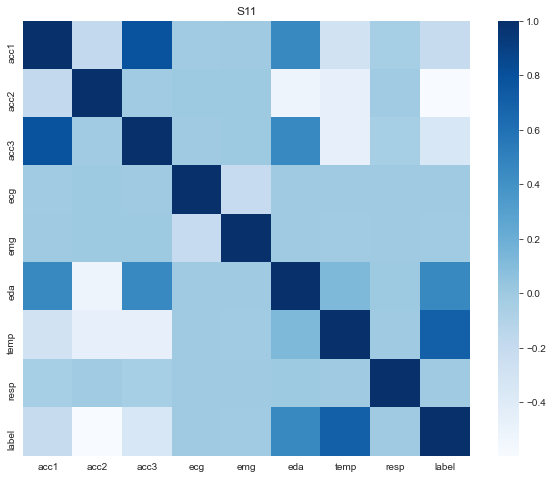

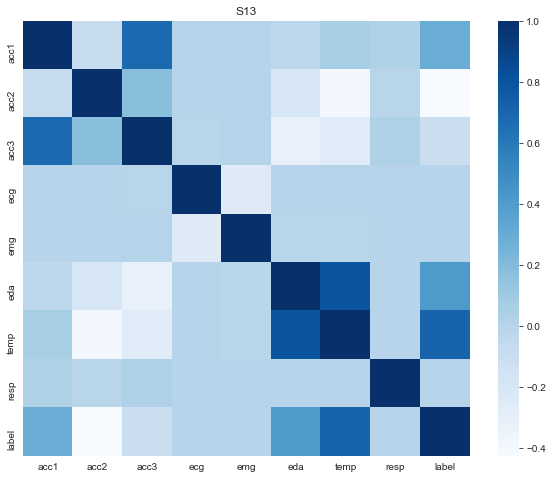

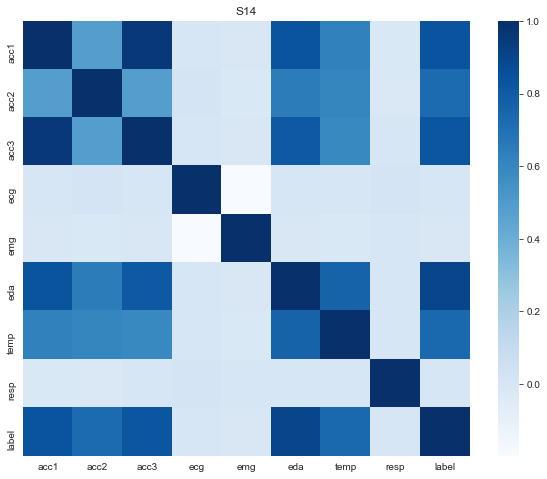

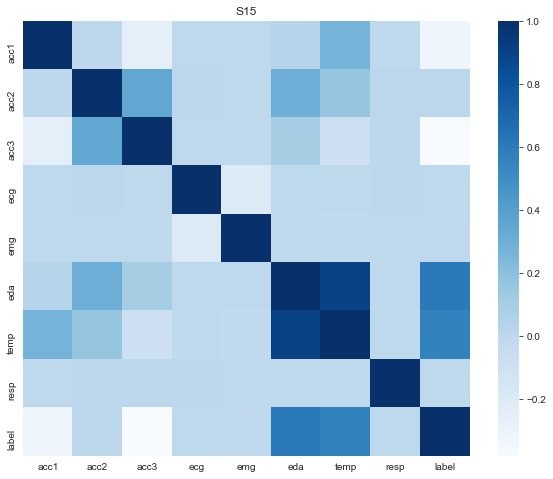

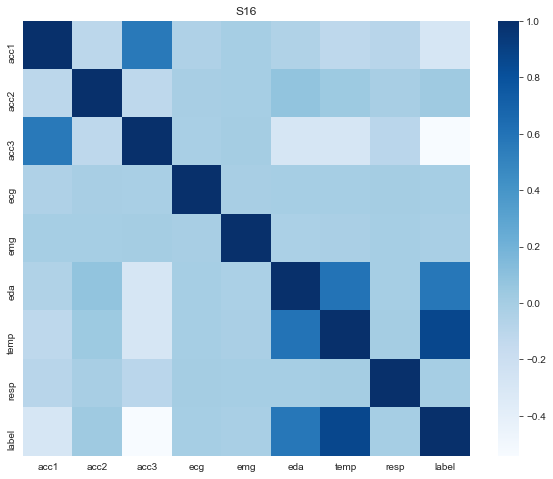

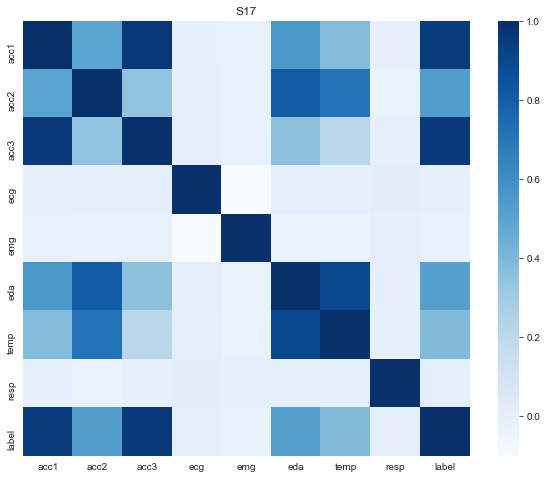

In [42]:
for i, sid in enumerate(ids):
    file = 'S' + str(sid) + '.pkl'
    print("")
    print(file)
    df = pd.read_pickle(file)
    df=df.drop(['sid'], axis=1)
    print("df.label.value_counts: ")
    print(df.label.value_counts())
    plt.figure(figsize=(10,8))
    plt.title('S' + str(sid))
    sns.heatmap(df.corr(),cmap='Blues',annot=False) 
    

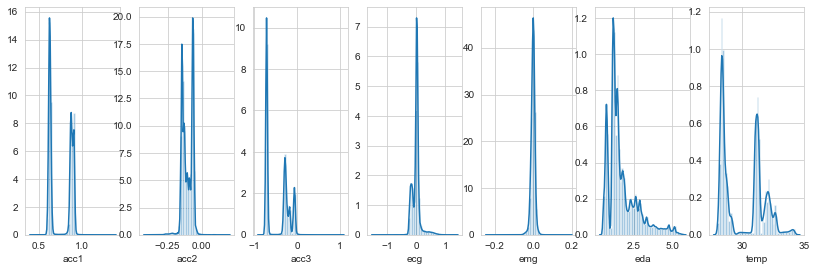

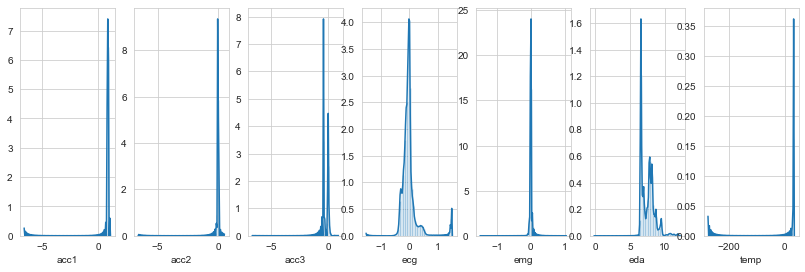

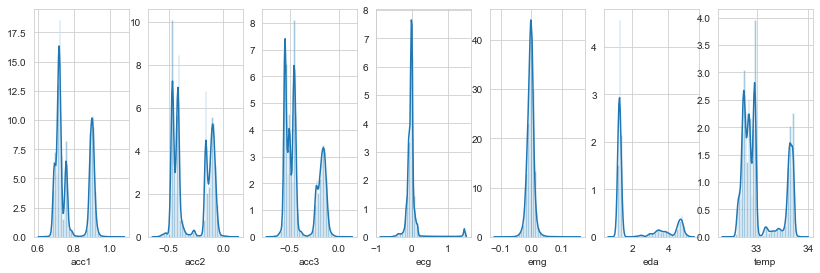

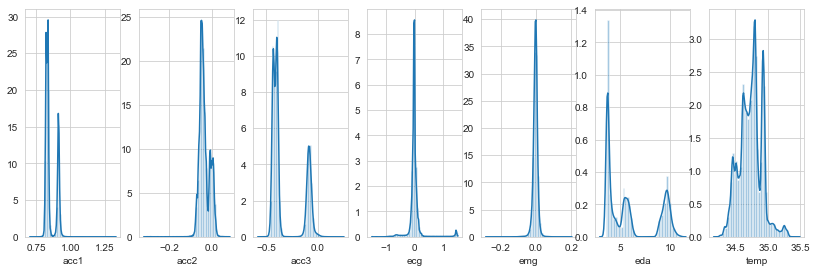

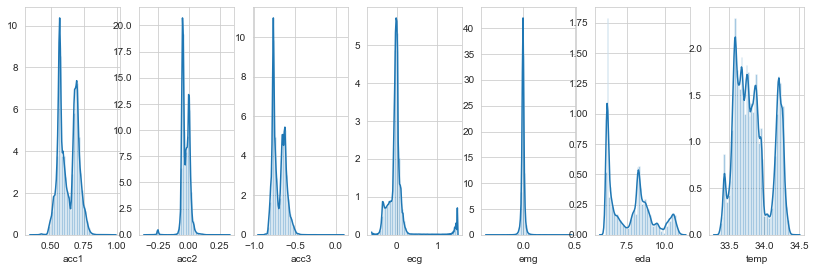

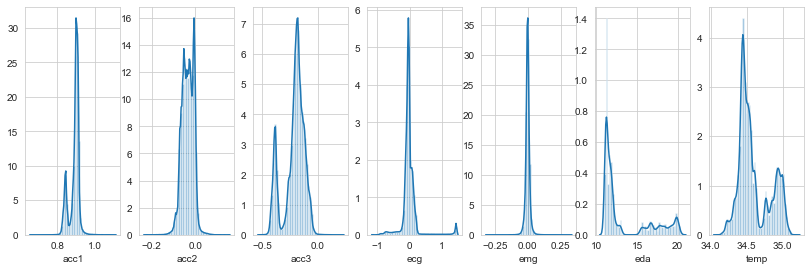

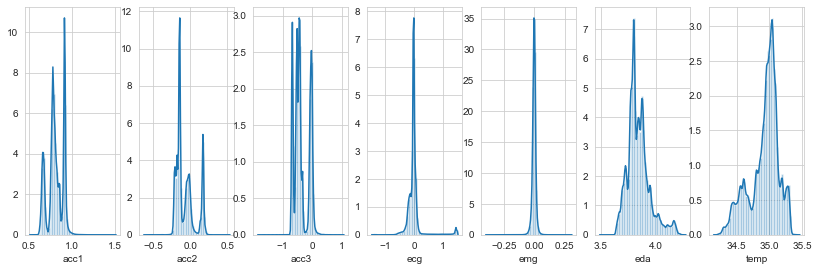

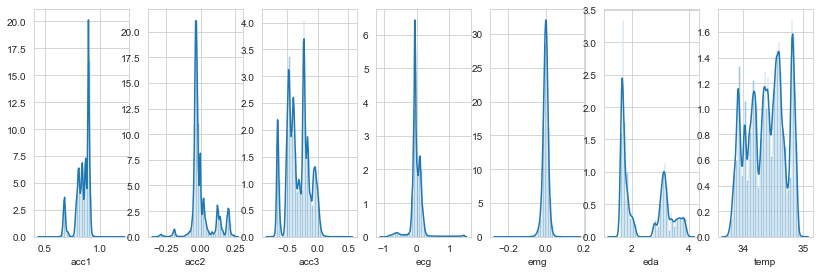

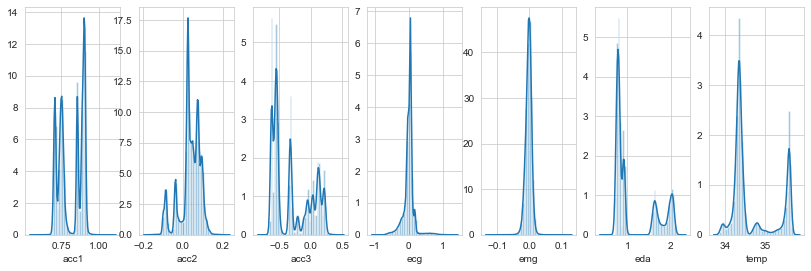

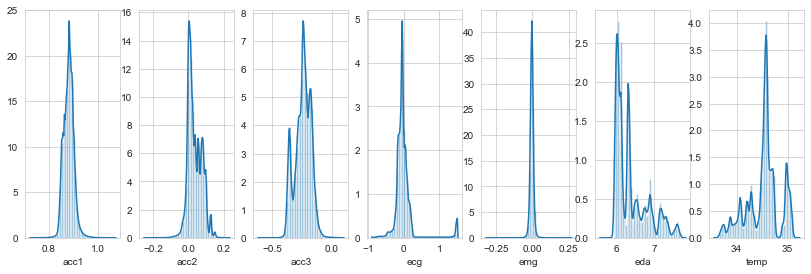

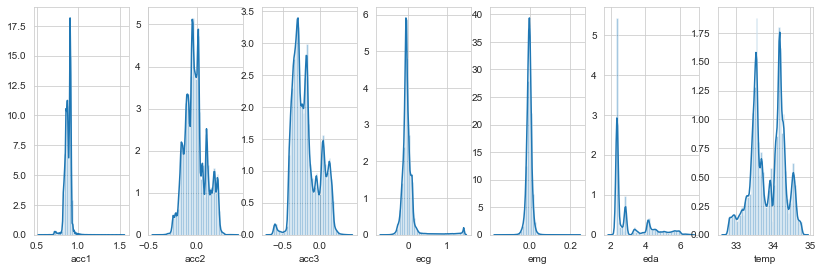

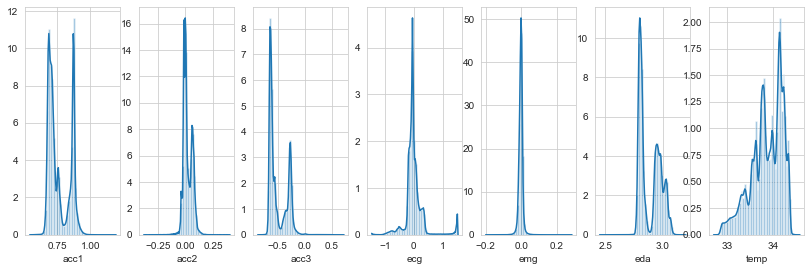

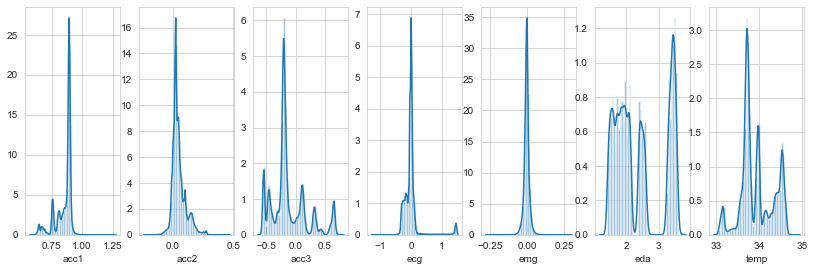

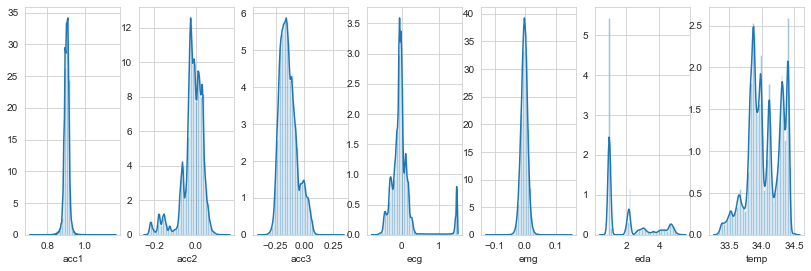

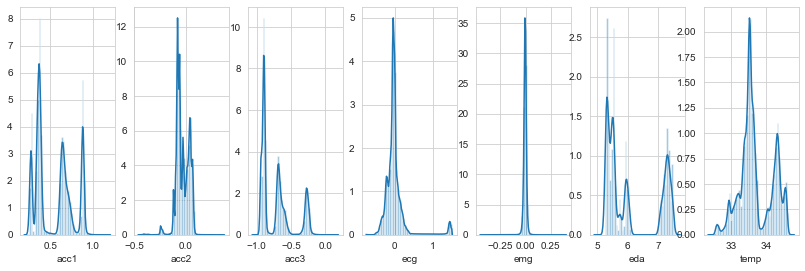

In [43]:
l = ['acc1', 'acc2', 'acc3', 'ecg', 'emg', 'eda', 'temp', 'resp']
number_of_columns=8
number_of_rows = len(l)-1/number_of_columns
for i, sid in enumerate(ids):
    file = 'S' + str(sid) + '.pkl'
    df = pd.read_pickle(file)
    df=df.drop(['sid'], axis=1)
    plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
    plt.title('S' + str(sid))
    for i in range(0,len(l)-1):
        plt.subplot(number_of_rows + 1,number_of_columns,i+1)
        sns.distplot(df[l[i]],kde=True) 

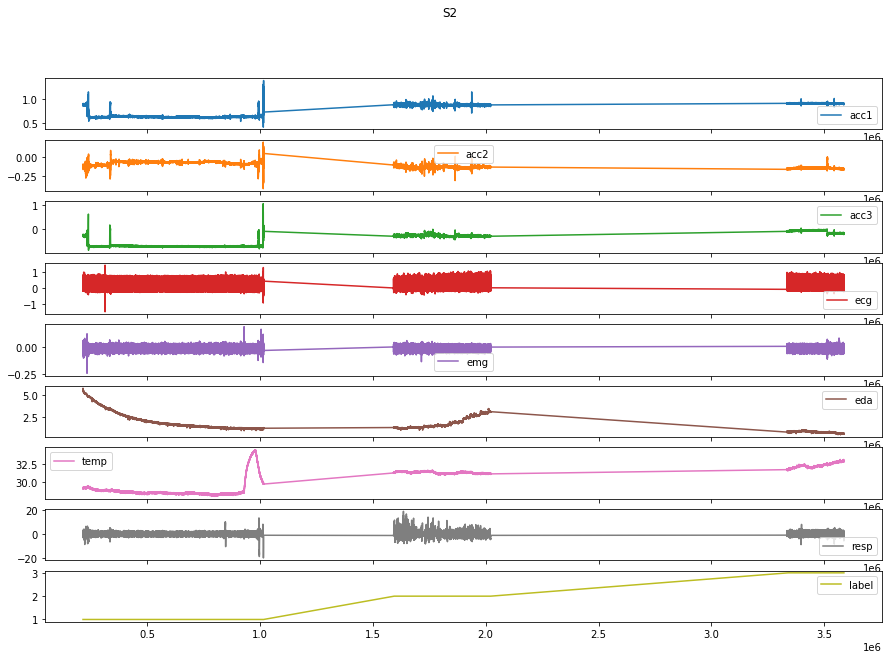

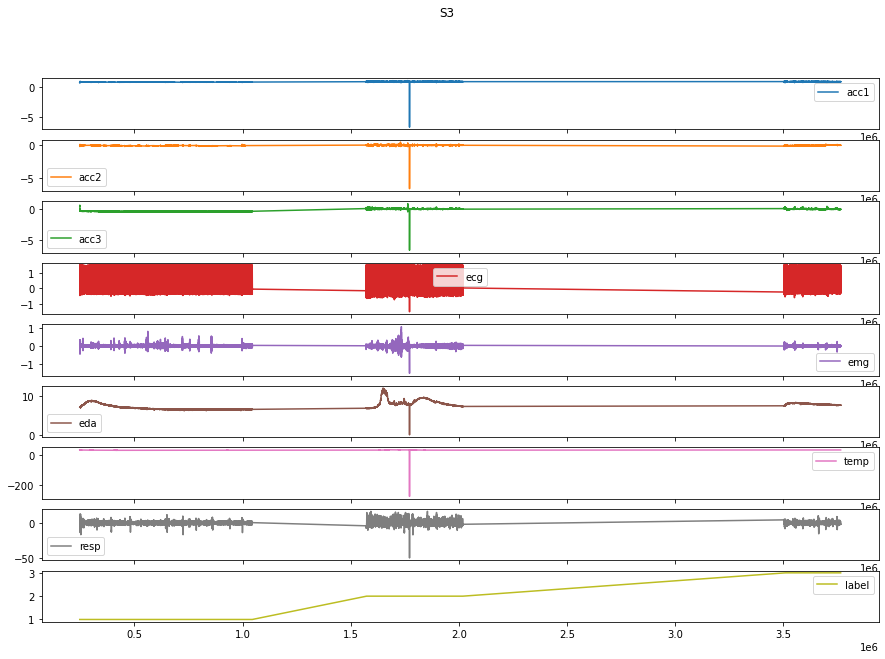

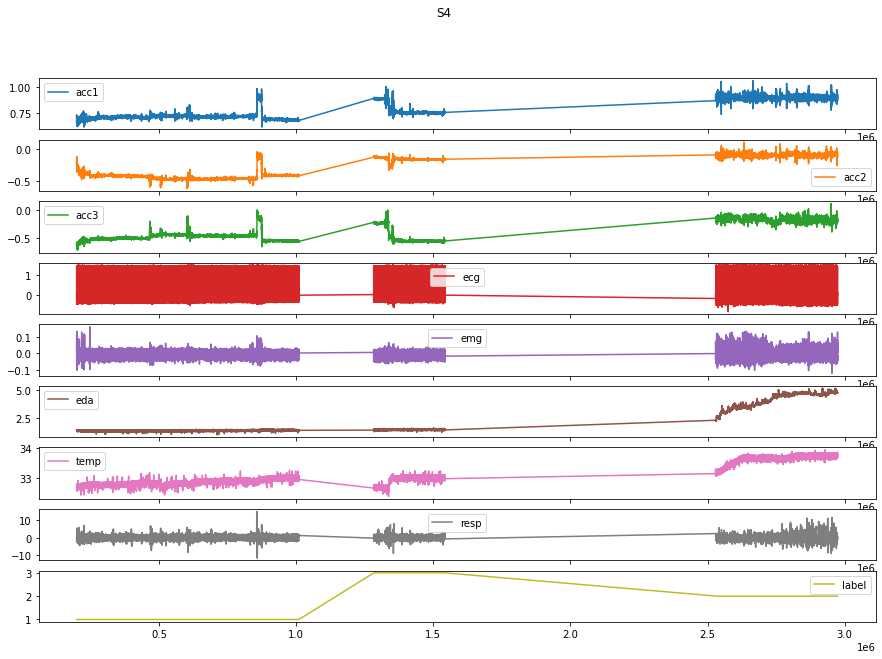

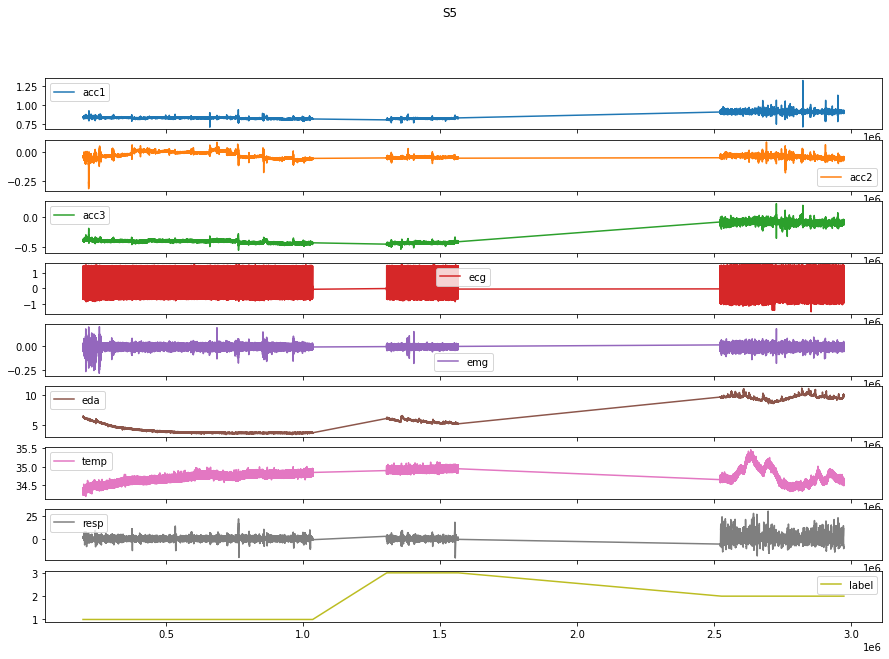

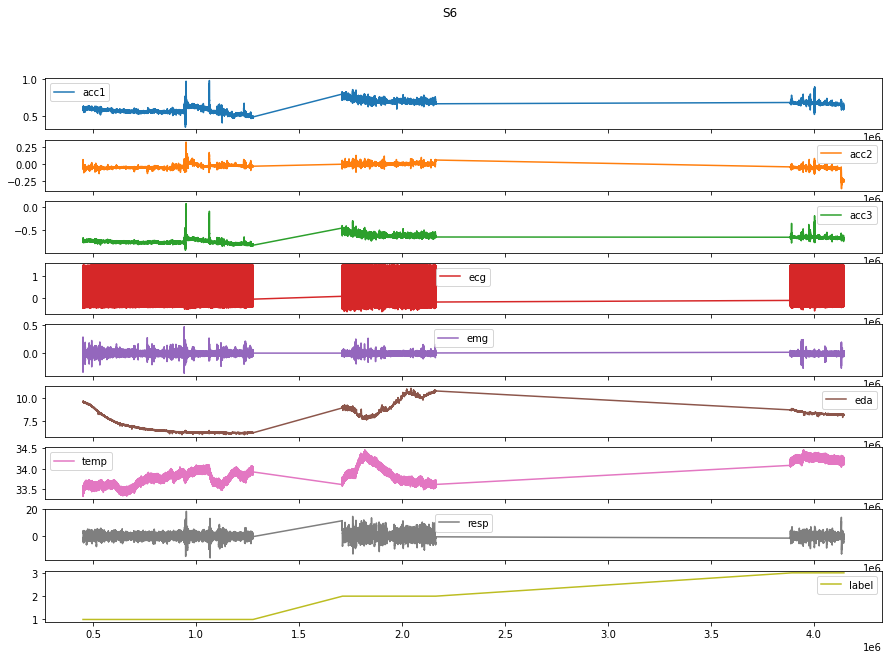

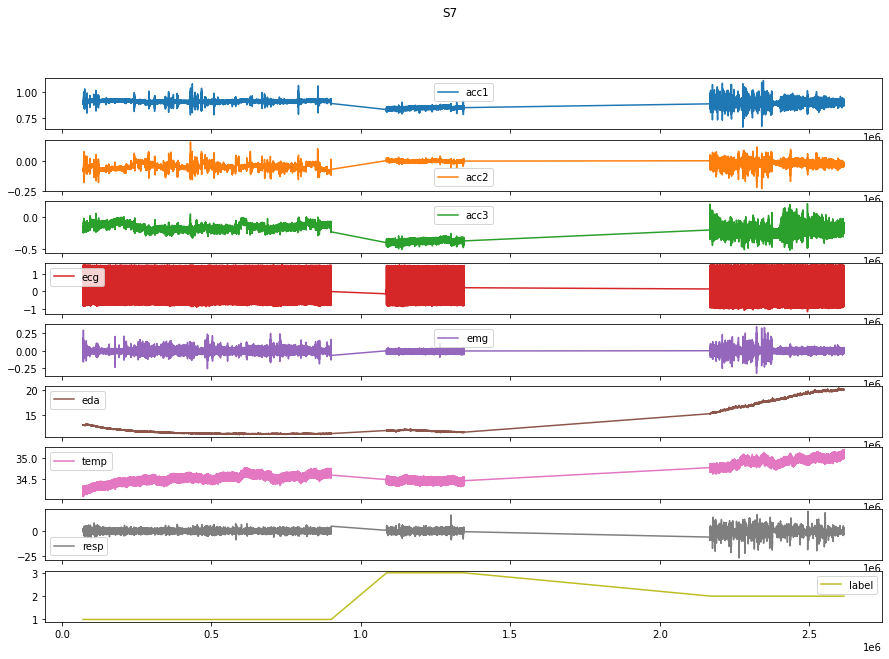

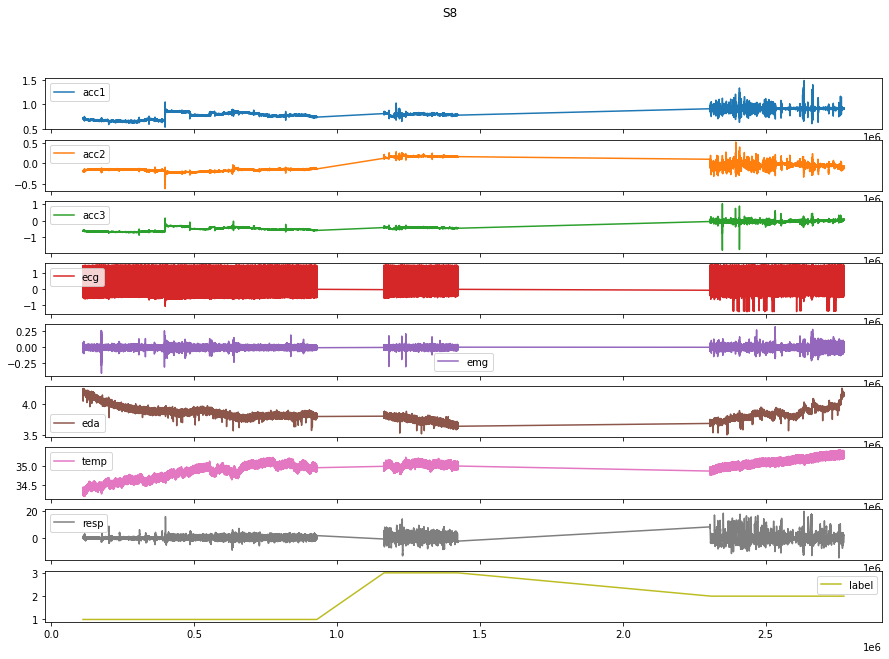

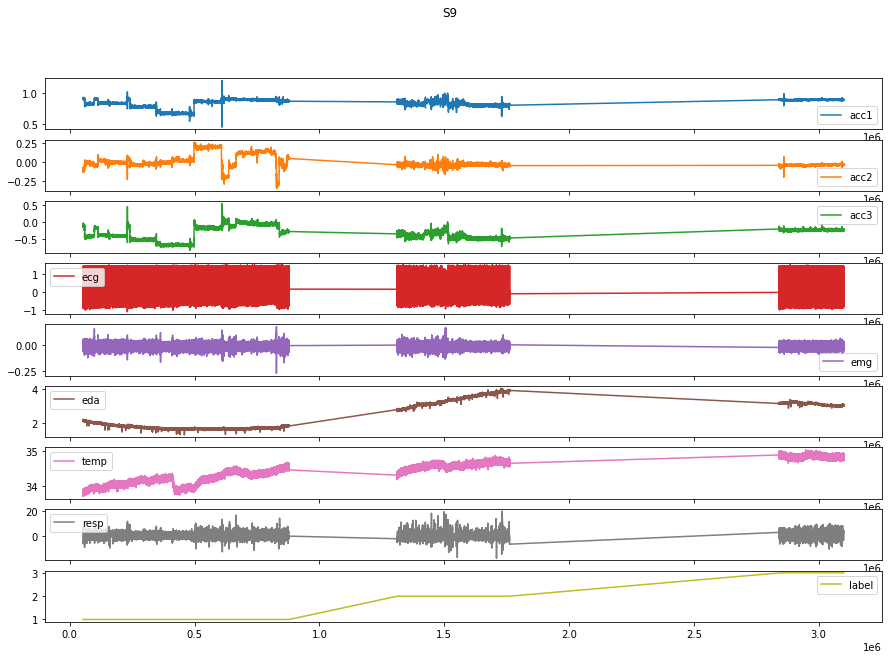

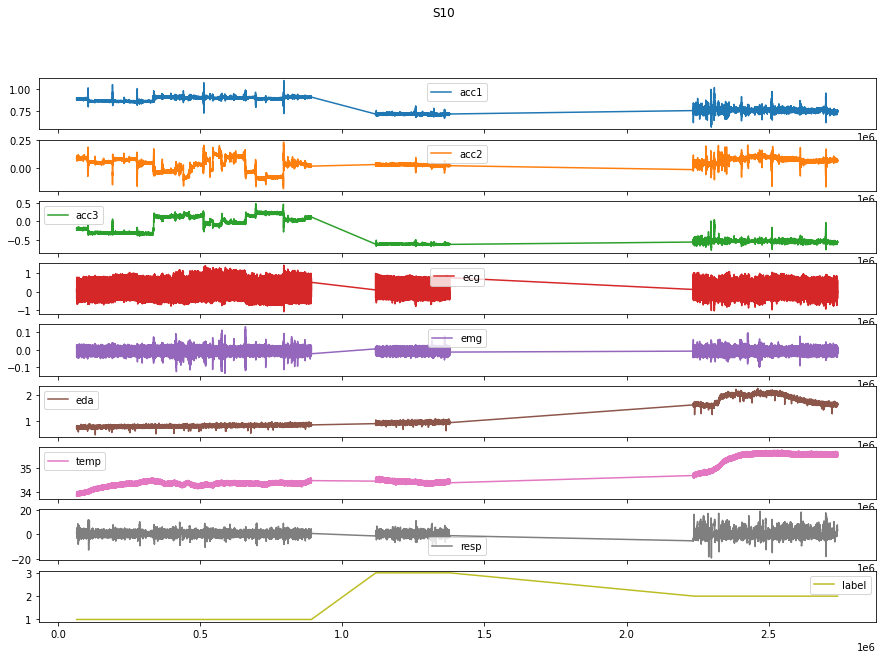

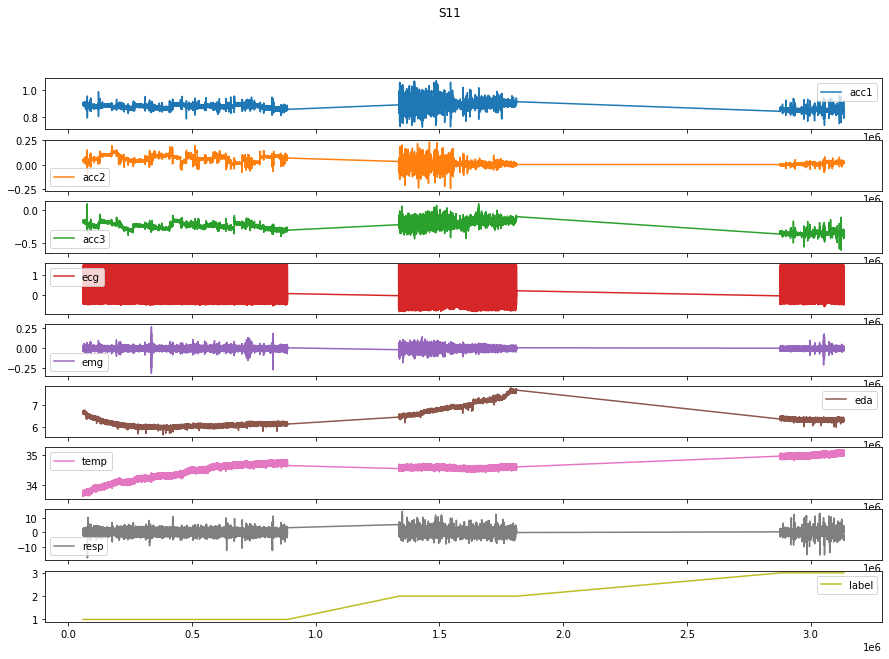

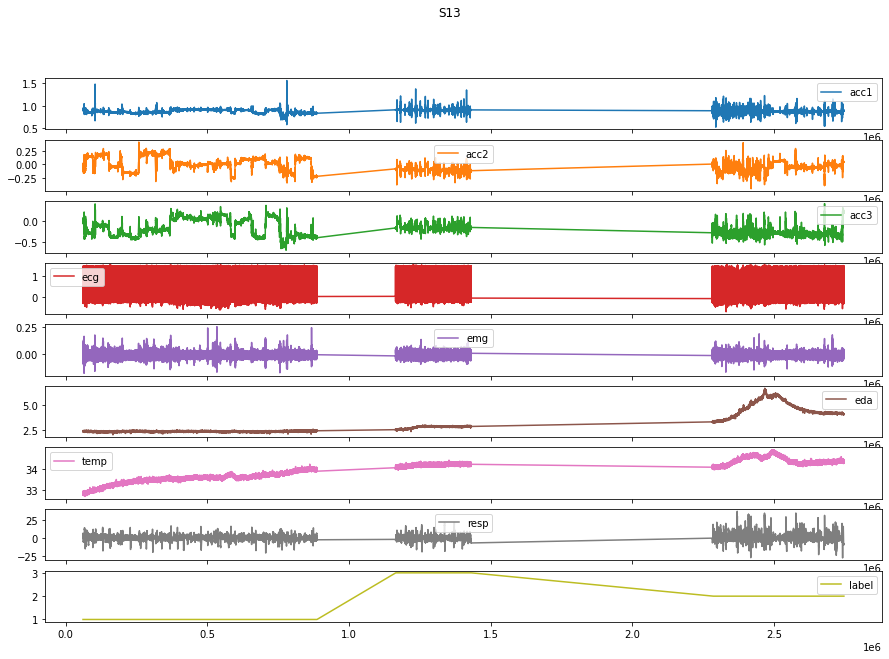

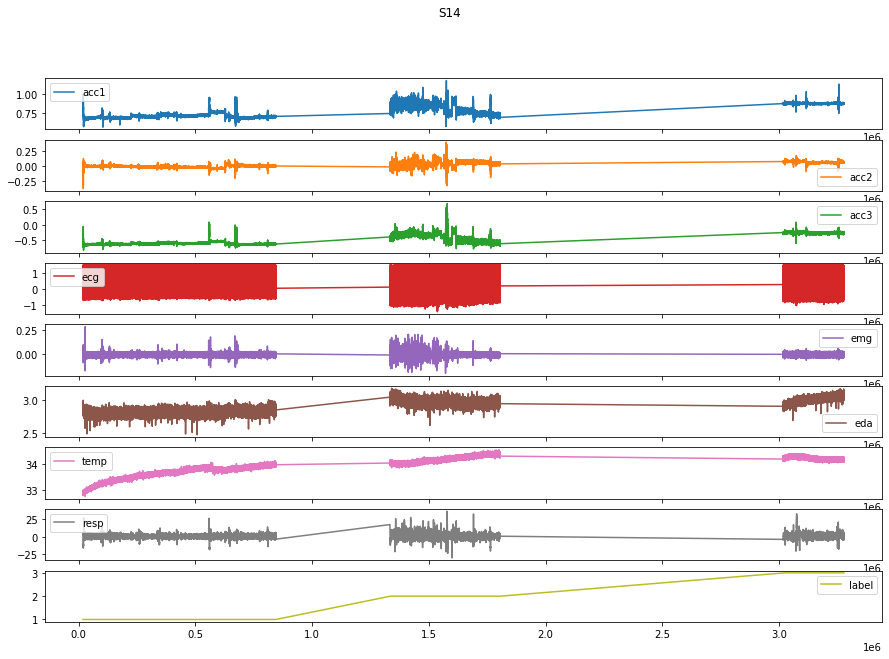

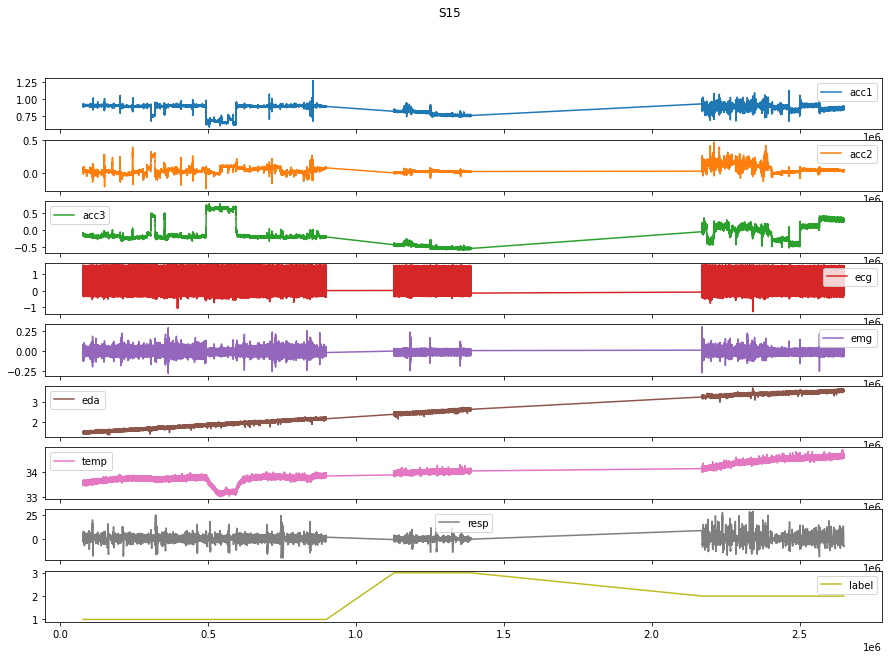

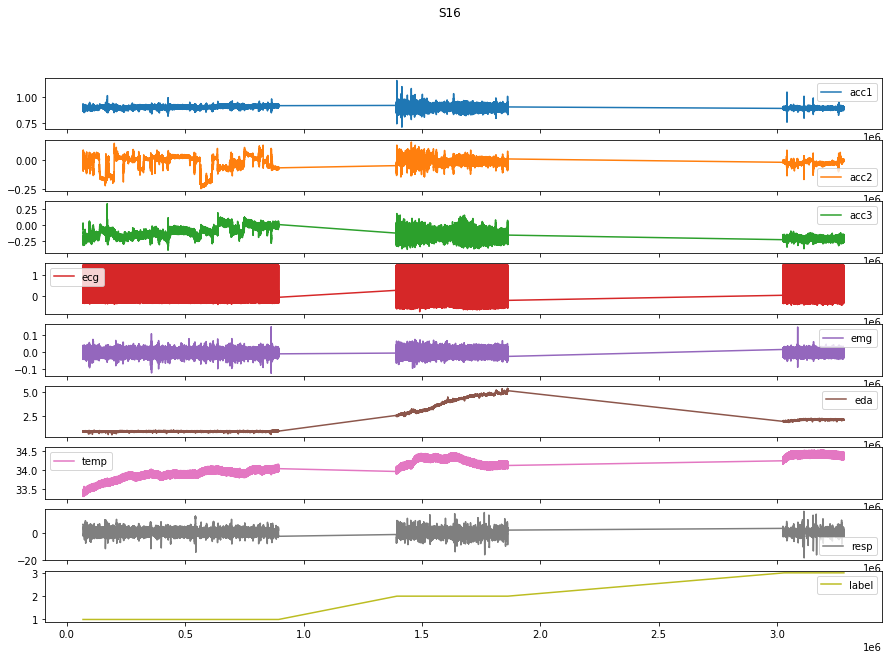

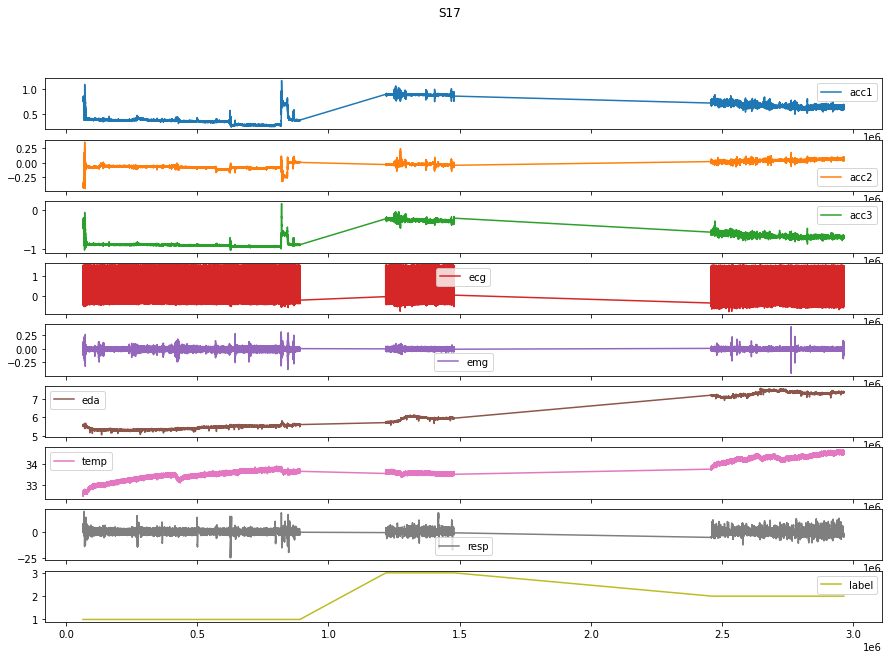

In [44]:
for i, sid in enumerate(ids):
    file = 'S' + str(sid) + '.pkl'
    df = pd.read_pickle(file)
    df=df.drop(['sid'], axis=1)
    df.plot(subplots=True, figsize=(15,10), title ='S' + str(sid) )

## Investigate negative or invalid values

In [48]:
df3 = pd.read_pickle("S3.pkl")

In [49]:
df3[df3["temp"]<0]

,sid,acc1,acc2,acc3,ecg,emg,eda,temp,resp,label
1771710,3.0,-6.6,-6.6,-6.6,-1.5,-1.5,0.0,-273.149994,-50.0,2.0
1771711,3.0,-6.6,-6.6,-6.6,-1.5,-1.5,0.0,-273.149994,-50.0,2.0
1771712,3.0,-6.6,-6.6,-6.6,-1.5,-1.5,0.0,-273.149994,-50.0,2.0
1771713,3.0,-6.6,-6.6,-6.6,-1.5,-1.5,0.0,-273.149994,-50.0,2.0
1771714,3.0,-6.6,-6.6,-6.6,-1.5,-1.5,0.0,-273.149994,-50.0,2.0
...,...,...,...,...,...,...,...,...,...,...
1771788,3.0,-6.6,-6.6,-6.6,-1.5,-1.5,0.0,-273.149994,-50.0,2.0
1771789,3.0,-6.6,-6.6,-6.6,-1.5,-1.5,0.0,-273.149994,-50.0,2.0
1771790,3.0,-6.6,-6.6,-6.6,-1.5,-1.5,0.0,-273.149994,-50.0,2.0
1771791,3.0,-6.6,-6.6,-6.6,-1.5,-1.5,0.0,-273.149994,-50.0,2.0


In [50]:
df_fltr = df_fltr[df_fltr["temp"]>0]

In [51]:
 df_fltr["temp"].min()

28.045257568359375

In [52]:
 df_fltr["temp"].max()

35.778045654296875

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BF93C79670>],
      dtype=object)

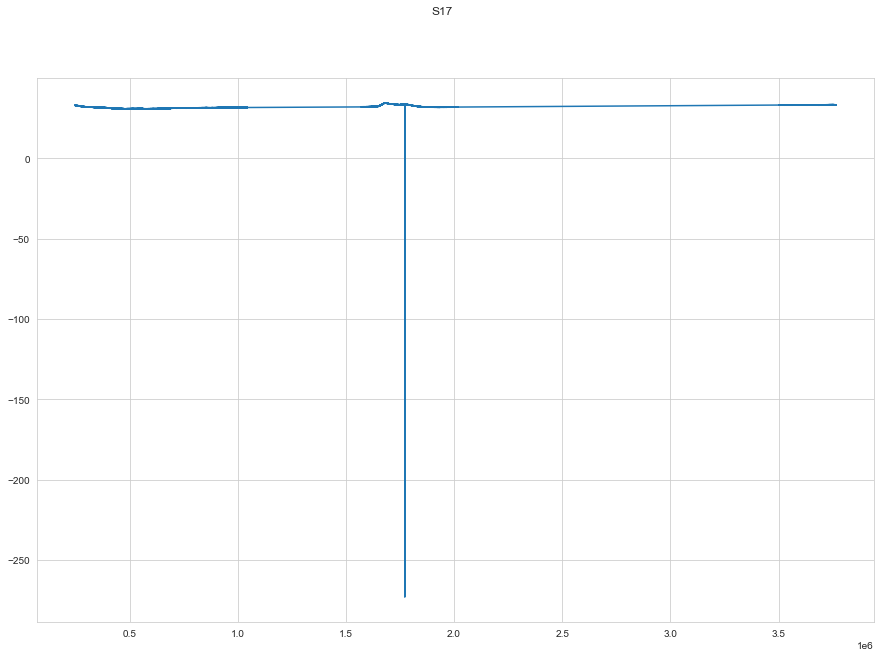

In [53]:
 df3["temp"].plot(subplots=True, figsize=(15,10), title ='S' + str(sid) )